# Data Science - Visualização dos dados do Gapminder com Scatter
## Nome: Guilherme Doretto Sobreiro | RM:99674
### Arquivos: https://www.gapminder.org/data/

### Importando as bibliotecas

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import re #Para converter a string do arquivo da população.

### Carregar os dados dos arquivos CSV

In [ ]:
lex_data = pd.read_csv('lex.csv')
daily_income_data = pd.read_csv('dailyincome.csv')
continent_data = pd.read_csv('continents.csv')
popu_data = pd.read_csv('popu.csv')

### Função para converter valores de população de string para números

In [ ]:
def convert_population(population_str):
    match = re.match(r"([0-9.]+)([A-Za-z]+)", population_str, re.I)
    if match:
        number = float(match.group(1))
        unit = match.group(2).lower()

        if unit == 'm':
            return number * 1_000_000
        elif unit == 'b':
            return number * 1_000_000_000
    return None

### Aqui renomeando a coluna 'name' para 'country' no dataframe `continent_data` para conseguir usar com os outros dataframes.


In [ ]:
continent_data.rename(columns={'name': 'country'}, inplace=True)

### Unindo os dados dos diferentes dataframes utilizando a função `merge()` do pandas.

In [ ]:
# Uni os dados de expectativa de vida e renda diária
merged_data = pd.merge(lex_data, daily_income_data, on='country')

# Uni os dados do continente
merged_data = pd.merge(merged_data, continent_data, on='country')

# Uni os dados de população
merged_data = pd.merge(merged_data, popu_data, on='country')

### Extraindo as colunas relevantes dos dados mesclados.


In [ ]:
expectancy_2020 = merged_data['2020_x']
income_2020 = merged_data['2020_y']
continent = merged_data['region']

### Aplicando a função `convert_population` na coluna de população do dataframe para converter os valores de população de strings para números.

In [ ]:
population = merged_data['2020'].apply(convert_population)

### Ajustando o tamanho das bolhas no gráfico de dispersão proporcional à população.

In [ ]:
# Reduzindo o tamanho das bolhas para melhor visualização
bubble_sizes = (population / 1_000_000) * 10

### Criando um gráfico de dispersão separado para cada continente.

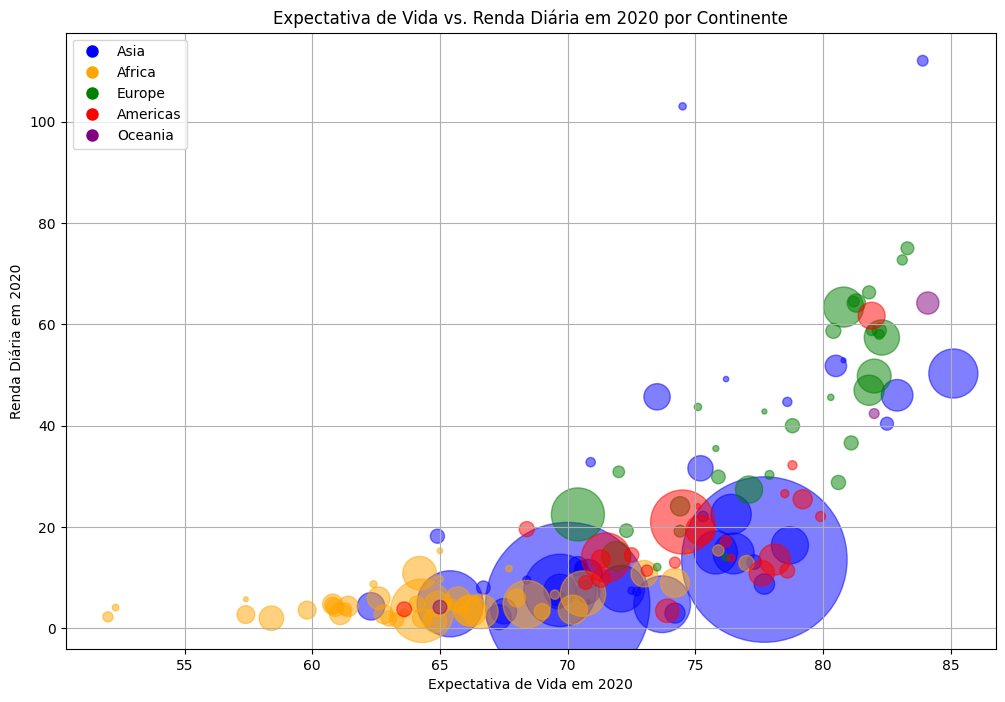

In [ ]:
continents = merged_data['region'].unique()
colors = ['blue', 'orange', 'green', 'red', 'purple']

plt.figure(figsize=(12, 8))
for i, continent_name in enumerate(continents):
    continent_data = merged_data[merged_data['region'] == continent_name]
    plt.scatter(continent_data['2020_x'], continent_data['2020_y'], s=bubble_sizes[continent_data.index], alpha=0.5, label=continent_name, color=colors[i])

# Criando as legendas
legend_entries = [plt.Line2D([0], [0], marker='o', color='w', label=continent, markerfacecolor=colors[i], markersize=10) for i, continent in enumerate(continents)]
plt.legend(handles=legend_entries)

plt.title('Expectativa de Vida vs. Renda Diária em 2020 por Continente')
plt.xlabel('Expectativa de Vida em 2020')
plt.ylabel('Renda Diária em 2020')
plt.grid(True)
plt.show()
